# DIP Lab 7: Histogram Equalization

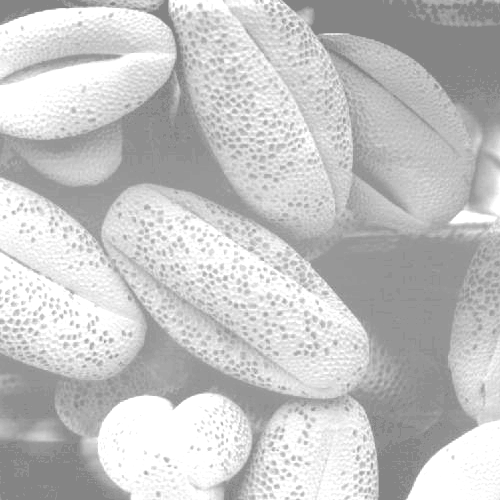

In [1]:
from PIL import Image
from collections import defaultdict

# Open Image
image = Image.open("hist2.tif")
# Convert to Greyscale
image = image.convert('L')
original_image = image
original_image

### Plotting Histogram of Original Image

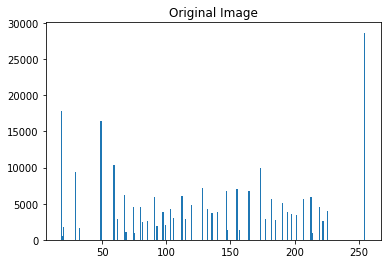

In [5]:
# Plotting Histogram
import matplotlib.pyplot as plt
def histogram(image,text):
    data = list(image.getdata())
    plt.hist(data,bins=255)
    plt.title(text)
    plt.show()
# Original Image Histogram
histogram(original_image,"Original Image")

### Histogram Equalization Algorithm

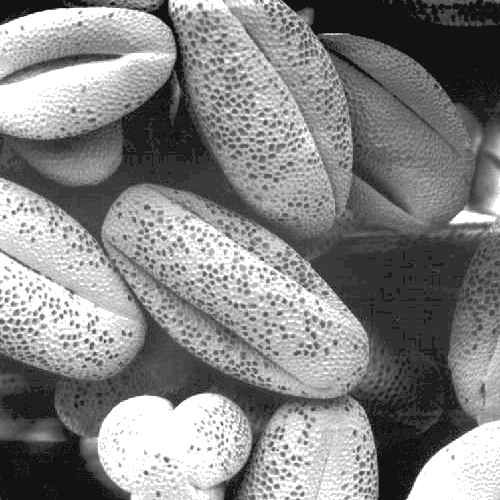

In [3]:
width, height = image.size
image_size = width * height

count_pixels = [[i,0] for i in range(0,256)]
# Counting Number of pixels 
for x in range(0,width):
    for y in range(0,height):
        pixel_value = image.getpixel((x,y))
        count_pixels[pixel_value][1] += 1

# Probability Density Function
count_pixels = [[key,value / image_size] for [key,value] in count_pixels]

# Cumulative Density Function
for pixel_value in range(1, 256):
    count_pixels[pixel_value][1] += count_pixels[pixel_value - 1][1]

# Transformation Function
transformation = [[key,round(value * 255)] for [key,value] in count_pixels]
transformation = {transform[0]:transform[1] for transform in transformation}

# Applying the Transformation on Original Image
for x in range(0,width):
    for y in range(0, height):
        pixel = image.getpixel((x,y))
        pixel = transformation[pixel]
        image.putpixel((x,y), pixel)
image

### Histogram of Equalized Image

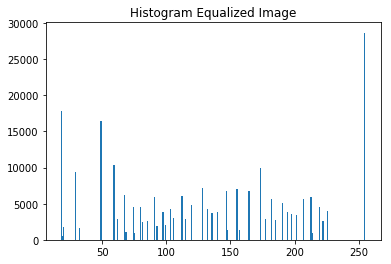

In [4]:
# Equalized Image Histogram
histogram(image,"Histogram Equalized Image")

**Does the equalized histogram equally distributed?**<br>
When dealing with a continuous image, infinite number of values lie in the interval. In the case of discrete equalization, finite number of pixels lie in the interval. The pixels are merely mapped to one another and the pixel values are not redistributed in the interval. So, the pixel values that have equal intensities will still have equal intensities after equalization. Therefore, even if the discrete histogram is close to the ideal or continuous histogram it will still not have a flat distribution.